# Sales Analysis of an Electronics Store

## 01. Importing required Libraries & Uploading the Dataset

In [1]:
import pandas as pd 
import glob 
import os

In [2]:
'''As we know that our Dataset contains Data of Different Months in Multiple csv Files;
At-first we have to Merge All the Files...'''

# setting the path for joining multiple files
files = os.path.join('D:\data_analysis\projects\sales_analysis', "sales*.csv")
# list of merged files returned
files = glob.glob(files)
# joining files with concat and read_csv
sales_df = pd.concat(map(pd.read_csv, files), ignore_index=True)
sales_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## 02. Data Preparation & Cleaning

In [3]:
# dropping the rows with NaN values & then resetting index of the dataframe:-
nan_df = sales_df.dropna(axis=0)
sales_df = nan_df.reset_index(drop=True)
sales_df 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
# let's have some basic information of our dataset:-
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186305 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


In [5]:
# converting the d-type of following columns: 'Quantity Ordered, Price Each'
sales_df['Quantity Ordered'] = pd.to_numeric(sales_df['Quantity Ordered'], errors = 'coerce')
sales_df['Price Each'] = pd.to_numeric(sales_df['Price Each'], errors = 'coerce')

# re-checking the d-type
#sales_df.info()

## 03. Exploratory Analysis & Visualizations

In [6]:
# importing required libraries:-
import numpy as np 
import seaborn as sns 
sns.set_style('darkgrid')
from matplotlib import pyplot as plt 
import matplotlib 

### Q1. Best Month of Sales, How much was Earned that Month?

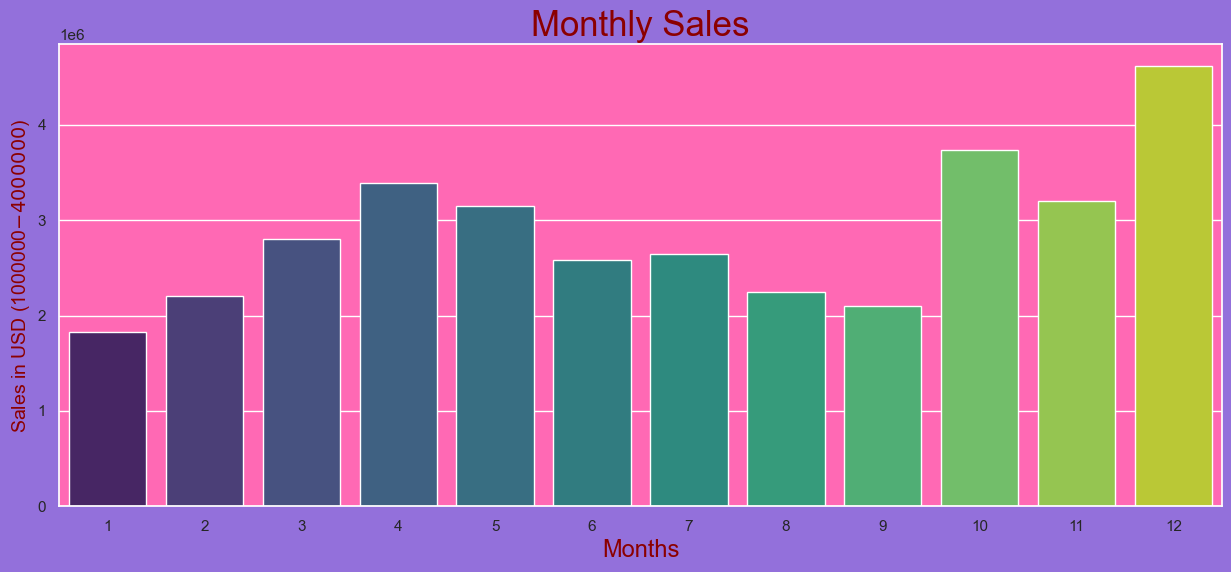

In [19]:
pd.options.mode.chained_assignment = None
# augmenting dataset with 'Month' column:-
sales_df = sales_df[sales_df['Order Date'].str[0:2]!='Or']
sales_df['Month'] = sales_df['Order Date'].str[0:2]
sales_df['Month'] = sales_df['Month'].astype('int32')

# making a 'Total_Sale' column in our dataset:-
sales_df['Total_Sale'] = sales_df['Quantity Ordered'] * sales_df['Price Each']

# now calculating the Total_Sale:-
sum = sales_df.groupby('Month')['Total_Sale'].sum()

# Visualizing the Results:-
plt.figure(figsize = (15,6))
sns.set(rc={'axes.facecolor':'hotpink', 'figure.facecolor':'mediumpurple'})
sns.barplot(x = sum.index, y =sum, palette = 'viridis');
plt.title('Monthly Sales', size = 25, color = 'darkred')
plt.xlabel('Months', size = 17, color = 'darkred')
plt.ylabel('Sales in USD (1000000$ - 4000000$)', size = 14, color = 'darkred');

####  The Best Month was 'December' with Sales nearly upto '4.6 Million'.

### Q2. Which City Sold the Most Products ?

In [20]:
pd.options.mode.chained_assignment = None
# at-first we have to make a new column which includes cities & their state:-
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

sales_df['City & State'] = sales_df['Purchase Address'].apply(lambda x:  f"{get_city(x)}  ({get_state(x)})")
sales_df 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Sale,City & State
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
186301,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186302,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186303,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


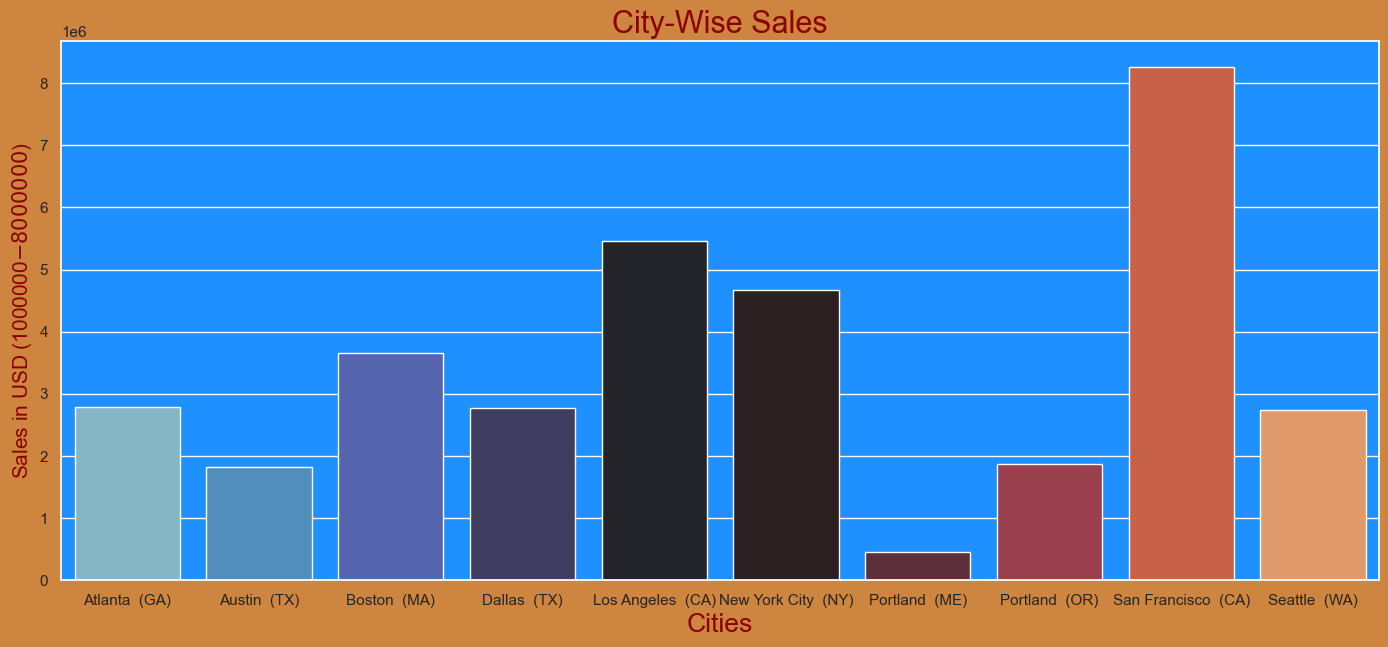

In [22]:
# now calculating the city-wise sales:-
city = sales_df.groupby('City & State')['Total_Sale'].sum()

# Visualizing the Results:-
plt.figure(figsize = (17,7))
sns.set(rc={'axes.facecolor':'dodgerblue', 'figure.facecolor':'peru'})
sns.barplot(x = city.index, y =city, palette = 'icefire');
plt.title('City-Wise Sales', size = 22, color = 'darkred')
plt.xlabel('Cities', size = 19, color = 'darkred')
plt.ylabel('Sales in USD (1000000$ - 8000000$)', size = 15, color = 'darkred');

#### 'San Francisco' had the Highest number of Sales out of all other Cities.

### Q3. What Time should we Display Advertisements to Maximize likelihood of Customer's Buying Product?

In [23]:
# changing the d-type of the 'Order Date' Columns:-
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])
# augmenting the dataset with following columns:-
sales_df['Hour'] = sales_df['Order Date'].dt.hour 
sales_df['Minutes'] = sales_df['Order Date'].dt.minute 
sales_df 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Sale,City & State,Hour,Minutes
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27
...,...,...,...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20,56
186301,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16,0
186302,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7,39
186303,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17,30


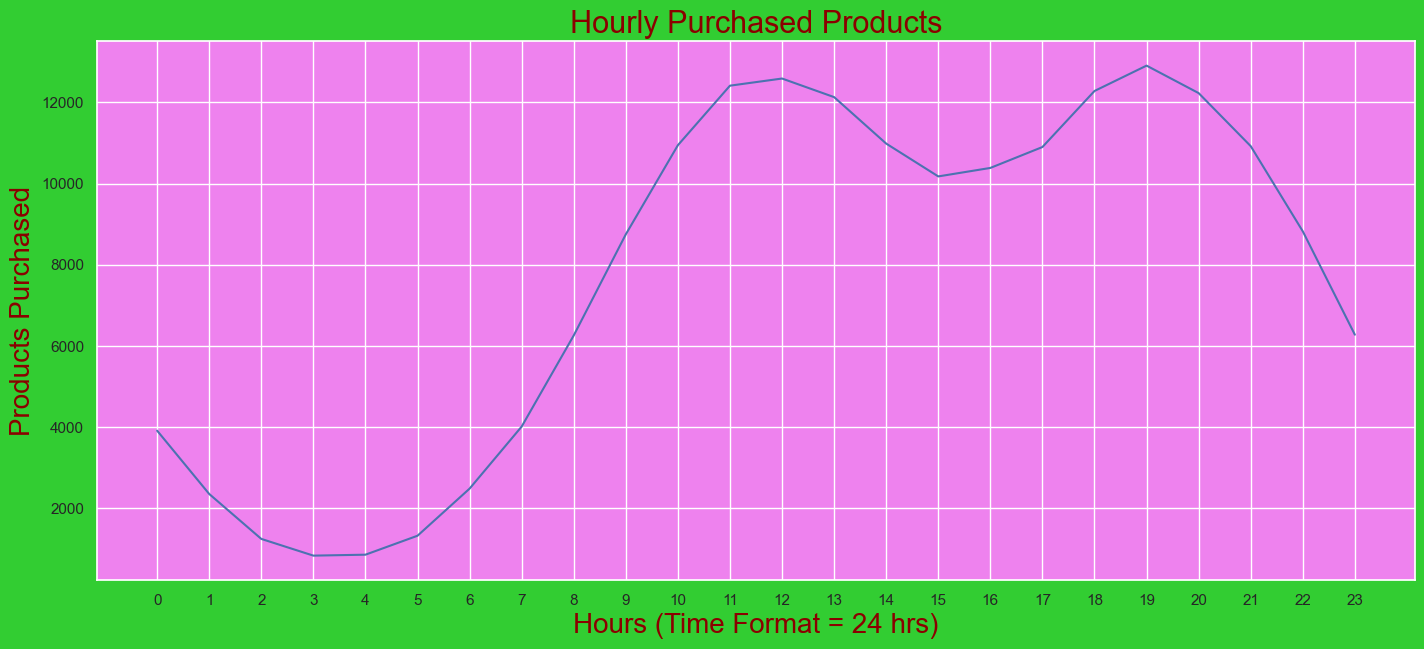

In [25]:
# now calculating the best time:-
time = sales_df.groupby('Hour')['Total_Sale'].count()

# Visualizing the Results:-
plt.figure(figsize = (17,7))
sns.set(rc={'figure.facecolor':'limegreen', 'axes.facecolor':'violet'})
sns.lineplot(x = time.index, y =time);
plt.xticks(time.index)
plt.title('Hourly Purchased Products', size = 22, color = 'darkred')
plt.xlabel('Hours (Time Format = 24 hrs)', size = 20, color = 'darkred')
plt.ylabel('Products Purchased', size = 20, color = 'darkred');

#### Best Time to Show Ads is '10AM - 12AM' and '5PM - 7PM'.

### Q4.  What Products are Most often Sold Together?

In [26]:
pd.options.mode.chained_assignment = None

# working with 'Order ID' column & augmenting a new column in our dataset:-
combine = sales_df[sales_df['Order ID'].duplicated(keep=False)]
combine['Together'] = combine.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
together = combine[['Order ID', 'Together']].drop_duplicates()

from itertools import combinations
from collections import Counter

count = Counter()

for row in together['Together']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### The 2 most Common Products Sold Together are 'iPhone and Lightning Charging Cable'.

### Q5. What Product Sold the Most & Why?

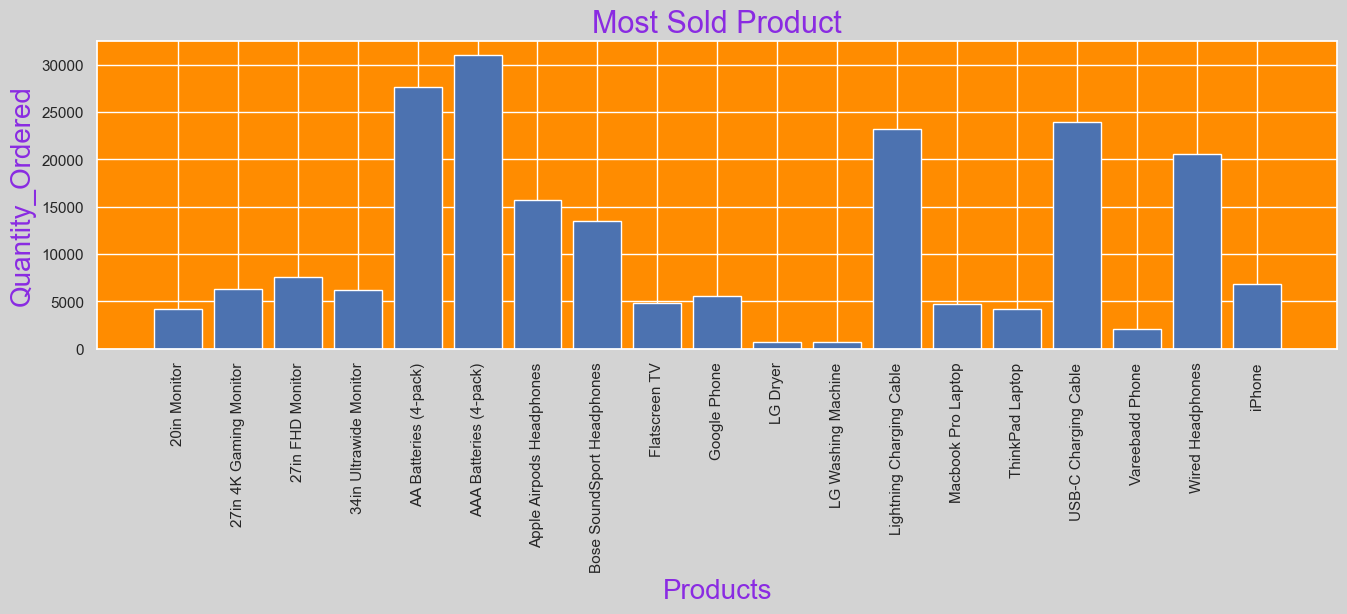

In [28]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.options.mode.chained_assignment = None

# answer 1:-
product_group = sales_df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]

# Visualizing the Results:-
plt.figure(figsize = (16,4))
sns.set(rc={'figure.facecolor':'lightgray', 'axes.facecolor':'darkorange'})
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical')
plt.title('Most Sold Product', size = 22, color = 'blueviolet')
plt.ylabel('Quantity_Ordered', size = 20, color = 'blueviolet')
plt.xlabel('Products', size = 20, color = 'blueviolet');

#### The 'AAA Batteries' are the most Sold Product followed by 'AA Batteries' with 'USB-C' and 'Lightning Charging Cables' Coming Close.

C:\Users\ZainU\AppData\Local\Temp\ipykernel_10108\4084683781.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=10);


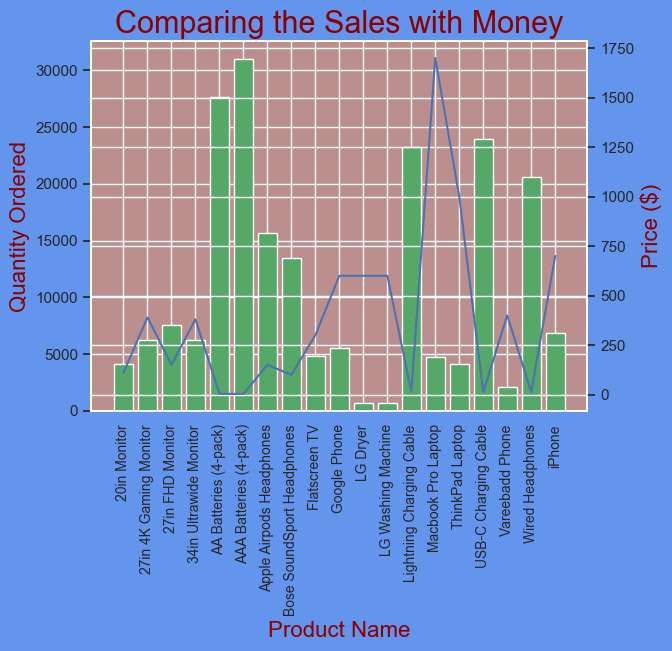

In [30]:
# answer 2:-
prices = sales_df.groupby('Product').mean()['Price Each']

# Visualizing the Results:-
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color = 'g')
ax2.plot(keys, prices, 'b-')
sns.set(rc={'figure.facecolor':'cornflowerblue', 'axes.facecolor':'rosybrown'})
plt.title('Comparing the Sales with Money', size = 22, color = 'darkred')
ax1.set_xlabel('Product Name', size = 16, color = 'darkred')
ax1.set_ylabel('Quantity Ordered', size = 16, color = 'darkred')
ax2.set_ylabel('Price ($)', size = 16, color = 'darkred')
ax1.set_xticklabels(keys, rotation='vertical', size=10);

### Since these Items are More Cheaper than many Other Items, there is a Possibility of this being the Reason for most Selling of these Items.